In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# Understanding Data

In [2]:
df = pd.read_csv('train_ctrUa4K.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df.isnull().mean() * 100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [9]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
for col in df.columns :
    print(f'the columns is {col}')
    print(f'{df[col].value_counts()}')
    print ('******************************')

the columns is Loan_ID
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64
******************************
the columns is Gender
Male      489
Female    112
Name: Gender, dtype: int64
******************************
the columns is Married
Yes    398
No     213
Name: Married, dtype: int64
******************************
the columns is Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
******************************
the columns is Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
******************************
the columns is Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64
******************************
the columns is ApplicantIncome
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Lengt

# Feature Engineering

In [12]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [13]:
df['LoanAmount'].unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [14]:
df['LoanAmount'] = df['LoanAmount'].apply(lambda x : x*1000)

In [15]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128000.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66000.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120000.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141000.0,360.0,1.0,Urban,Y


In [16]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [17]:
df['LoanAmount'].min()

9000.0

In [18]:
df[df['LoanAmount']==9000]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
568,LP002840,Female,No,0,Graduate,No,2378,0.0,9000.0,360.0,1.0,Urban,N


In [19]:
df['ApplicantIncome'].min()

150

In [20]:
df[df['ApplicantIncome']<1500]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
14,LP001030,Male,Yes,2,Graduate,No,1299,1086.0,17000.0,120.0,1.0,Urban,Y
28,LP001086,Male,No,0,Not Graduate,No,1442,0.0,35000.0,360.0,1.0,Urban,N
77,LP001259,Male,Yes,1,Graduate,Yes,1000,3022.0,110000.0,360.0,1.0,Urban,N
82,LP001267,Female,Yes,2,Graduate,No,1378,1881.0,167000.0,360.0,1.0,Urban,N
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168000.0,360.0,1.0,Rural,Y
216,LP001722,Male,Yes,0,Graduate,No,150,1800.0,135000.0,360.0,1.0,Rural,N
418,LP002345,Male,Yes,0,Graduate,No,1025,2773.0,112000.0,360.0,1.0,Rural,Y
468,LP002502,Female,Yes,2,Not Graduate,NaN,210,2917.0,98000.0,360.0,1.0,Semiurban,Y
500,LP002603,Female,No,0,Graduate,No,645,3683.0,113000.0,480.0,1.0,Rural,Y
530,LP002717,Male,Yes,0,Graduate,No,1025,5500.0,216000.0,360.0,NaN,Rural,Y


In [21]:
df.duplicated().sum()

0

In [22]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [23]:
df.drop('Loan_ID' , axis = 1 , inplace = True)

In [24]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128000.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66000.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120000.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141000.0,360.0,1.0,Urban,Y


In [25]:
df_copy = df

In [26]:
# imputer_test = KNNImputer(n_neighbors=5)

In [27]:
# df['Gender'] = imputer_test.fit_transform(df[['Gender']])

In [28]:
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [29]:
df['Gender'].mode()[0]

'Male'

In [30]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace = True)

In [31]:
df['Married'].mode()[0]

'Yes'

In [32]:
df['Married'].fillna(df['Married'].mode()[0], inplace = True)

In [33]:
# df[df['Self_Employed'].isna()]

In [34]:
df['Self_Employed'].mode()[0]

'No'

In [35]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0] , inplace = True)

In [36]:
df.isna().sum()

Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [38]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [39]:
df['Dependents']=df['Dependents'].replace('3+' , 3)

In [40]:
df['Dependents'].unique()

array(['0', '1', '2', 3, nan], dtype=object)

In [41]:
df['Dependents'] = df['Dependents'].astype(float)

In [42]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

In [43]:
# df.dropna(subset=['Credit_History'] , inplace = True)

In [44]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128000.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66000.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120000.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141000.0,360.0,1.0,Urban,Y


In [45]:
df['Credit_History'].isna().sum()

50

# Data Visualisation

In [46]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128000.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66000.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120000.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141000.0,360.0,1.0,Urban,Y


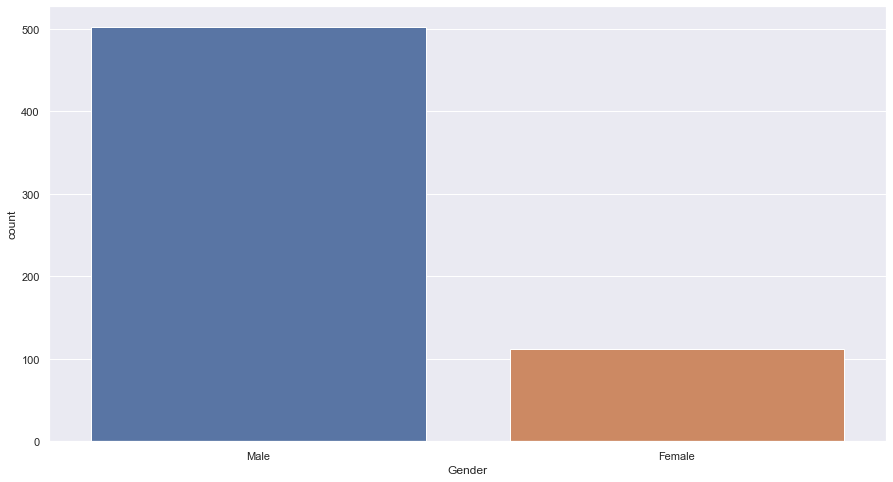

In [47]:
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(15,8)})
sns.countplot(data = df , x = "Gender")

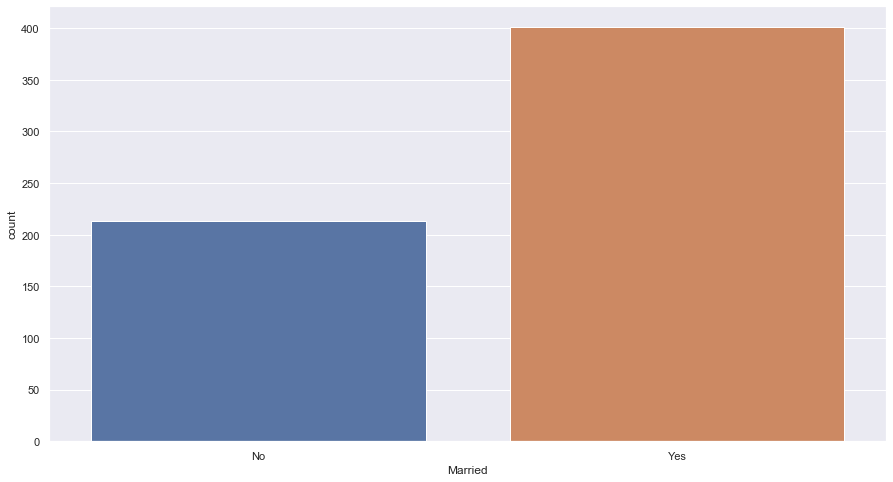

In [48]:
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(15,8)})
sns.countplot(data = df , x = "Married")

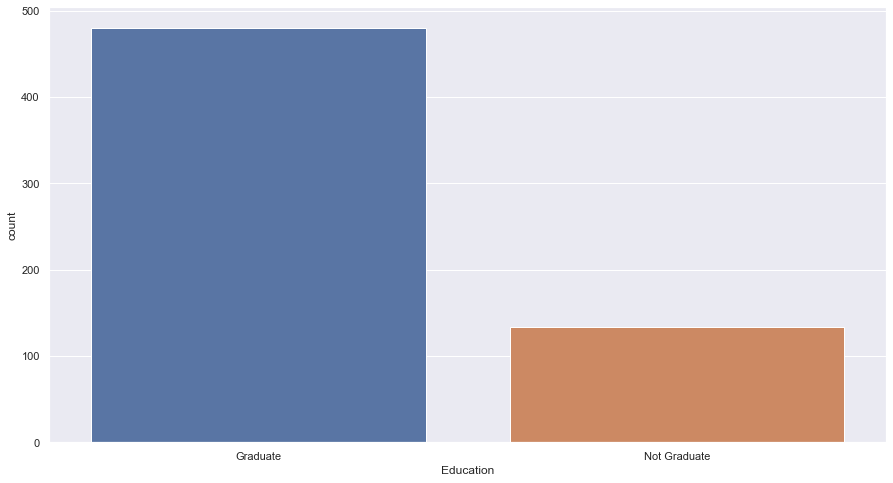

In [49]:
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(15,8)})
sns.countplot(data = df , x = "Education")

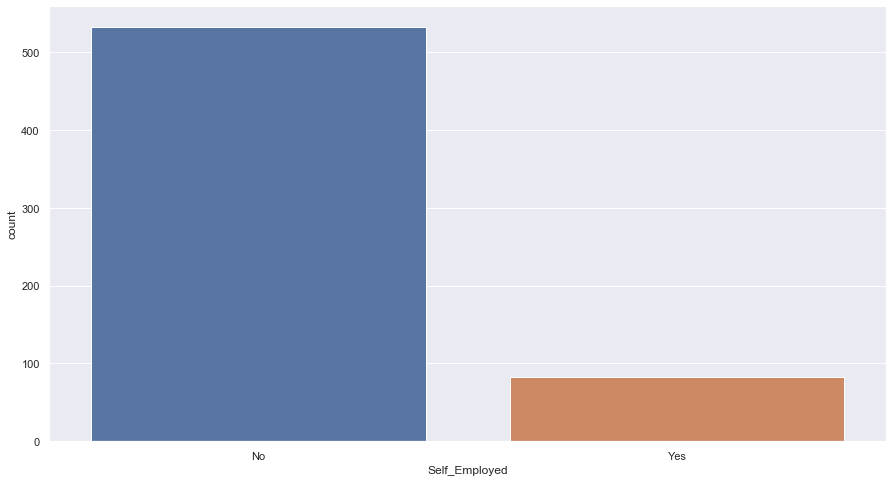

In [50]:
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(15,8)})
sns.countplot(data = df , x = "Self_Employed")

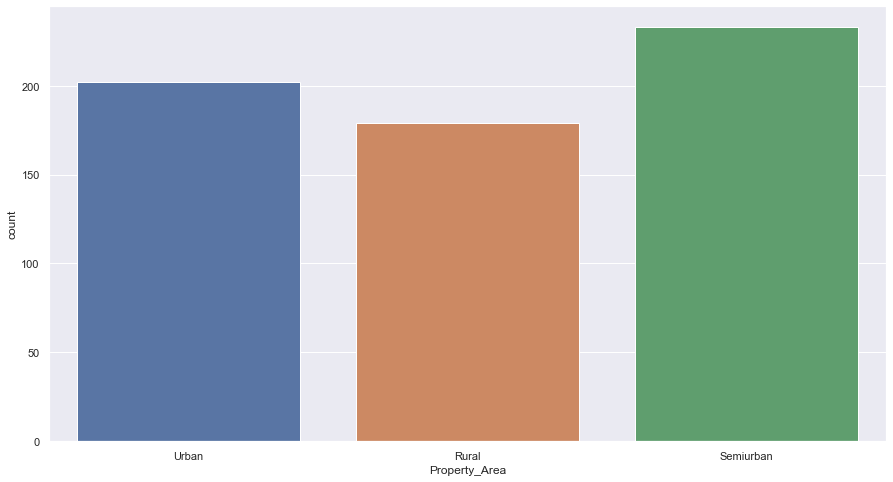

In [51]:
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(15,8)})
sns.countplot(data = df , x = "Property_Area")

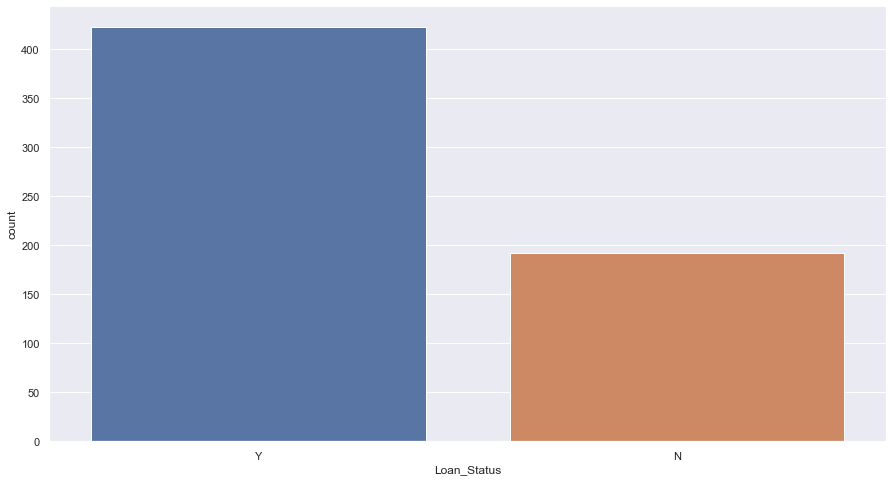

In [52]:
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(15,8)})
sns.countplot(data = df , x = "Loan_Status")

In [53]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

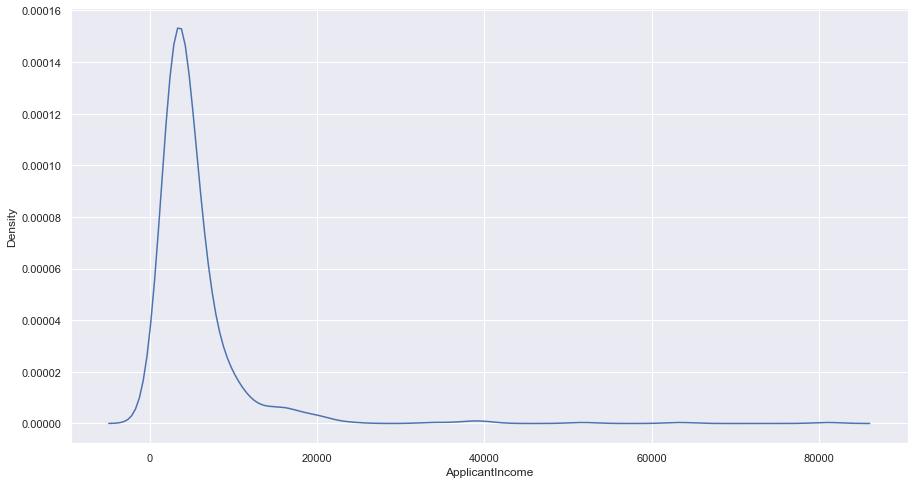

In [54]:
sns.kdeplot(data = df , x ="ApplicantIncome")

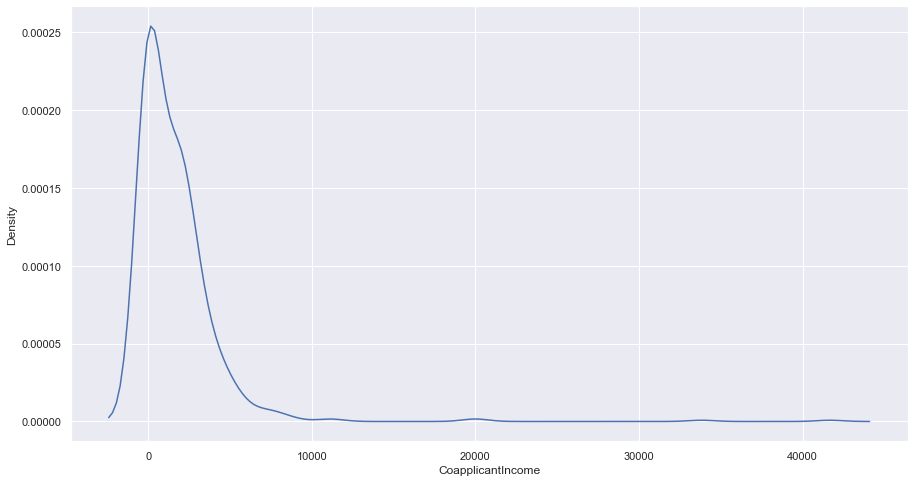

In [55]:
sns.kdeplot(data = df , x ="CoapplicantIncome")

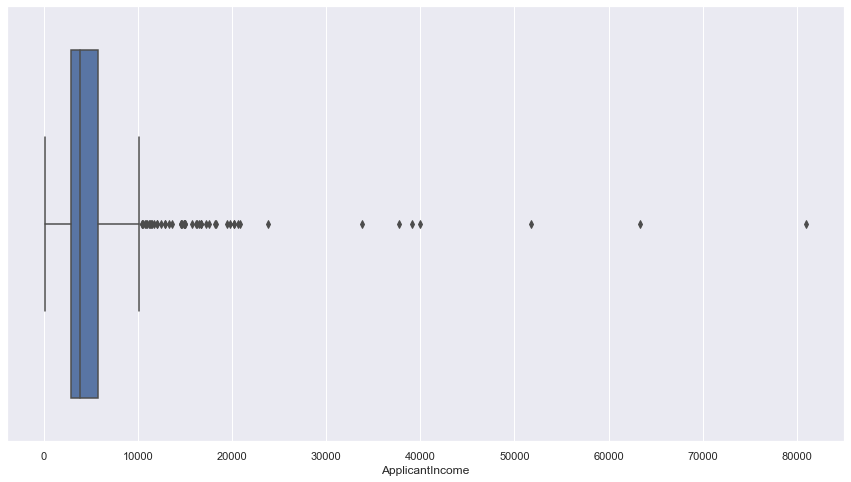

In [56]:
sns.boxplot(data = df , x ="ApplicantIncome")

In [57]:
df[df['ApplicantIncome'] > 20000]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
126,Male,Yes,3.0,Graduate,No,23803,0.0,370000.0,360.0,1.0,Rural,Y
130,Male,No,0.0,Graduate,Yes,20166,0.0,650000.0,480.0,NaN,Urban,Y
155,Male,Yes,3.0,Graduate,No,39999,0.0,600000.0,180.0,0.0,Semiurban,Y
171,Male,Yes,3.0,Graduate,No,51763,0.0,700000.0,300.0,1.0,Urban,Y
183,Male,Yes,1.0,Graduate,No,33846,0.0,260000.0,360.0,1.0,Semiurban,N
185,Male,Yes,0.0,Graduate,Yes,39147,4750.0,120000.0,360.0,1.0,Semiurban,Y
284,Male,Yes,0.0,Graduate,No,20667,0.0,NaN,360.0,1.0,Rural,N
308,Male,No,0.0,Graduate,No,20233,0.0,480000.0,360.0,1.0,Rural,N
333,Male,Yes,0.0,Graduate,No,63337,0.0,490000.0,180.0,1.0,Urban,Y
409,Male,Yes,3.0,Graduate,No,81000,0.0,360000.0,360.0,0.0,Rural,N


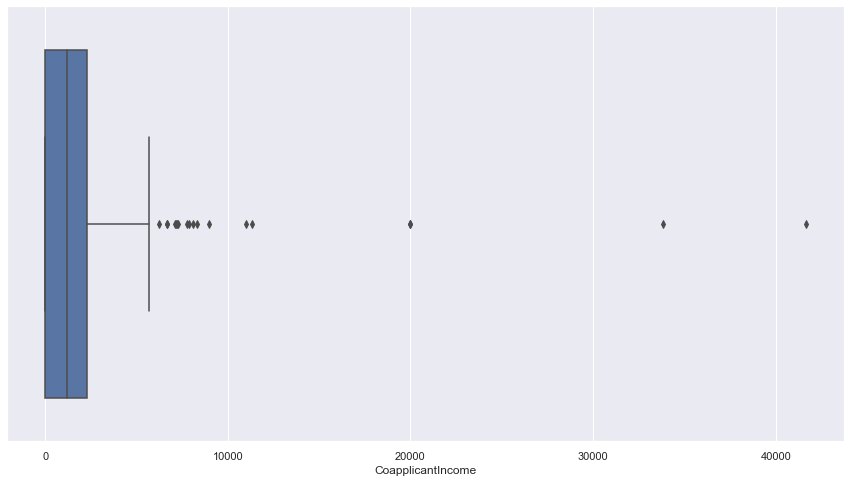

In [58]:
sns.boxplot(data = df , x ="CoapplicantIncome")

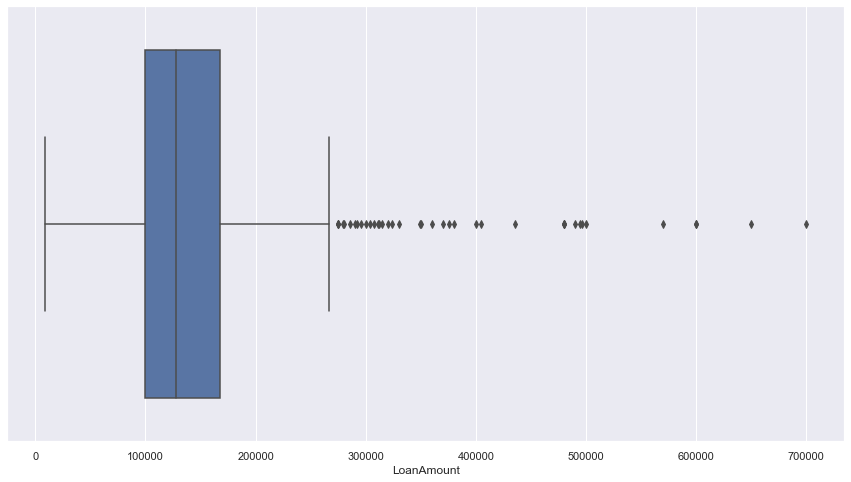

In [59]:
sns.boxplot(data = df , x ="LoanAmount")

In [60]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128000.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66000.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120000.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141000.0,360.0,1.0,Urban,Y


In [61]:
df.groupby('Loan_Status').mean()['LoanAmount']

Loan_Status
N    151220.994475
Y    144294.403893
Name: LoanAmount, dtype: float64

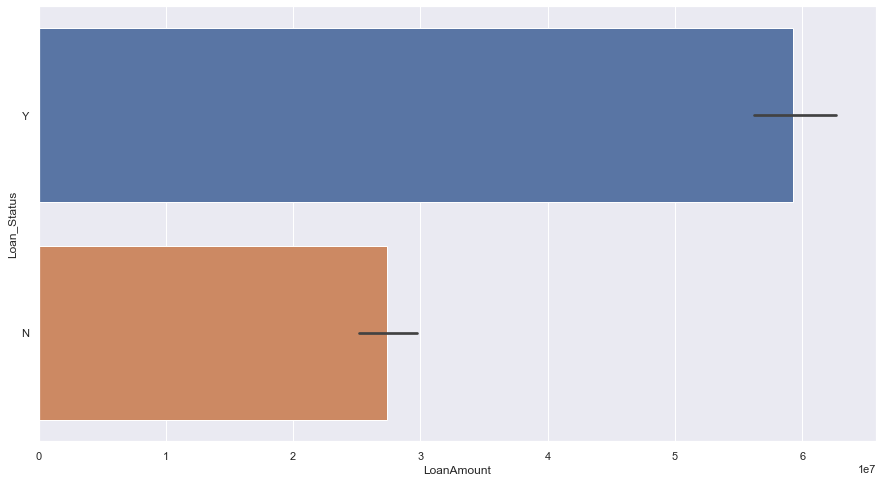

In [62]:
sns.set(rc={'figure.figsize':(15,8)})

sns.barplot(data = df , y = "Loan_Status" , x = "LoanAmount" , estimator=sum )

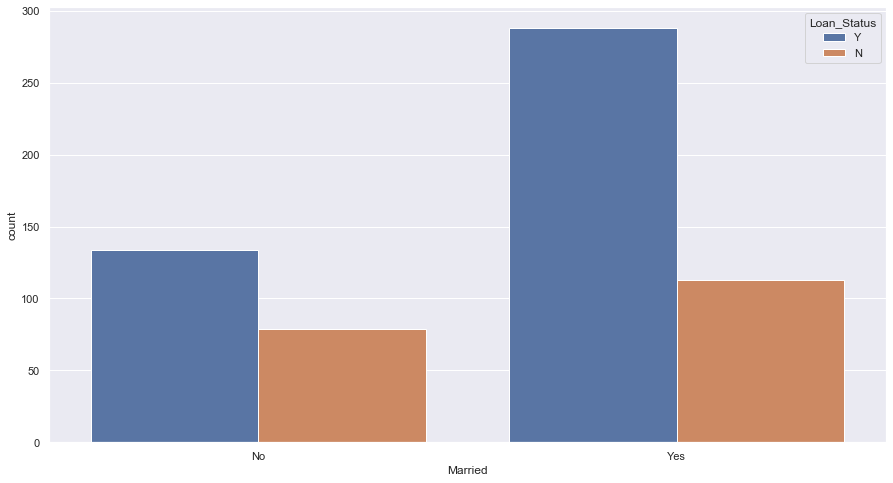

In [63]:
sns.countplot(data = df , x ="Married" , hue="Loan_Status")

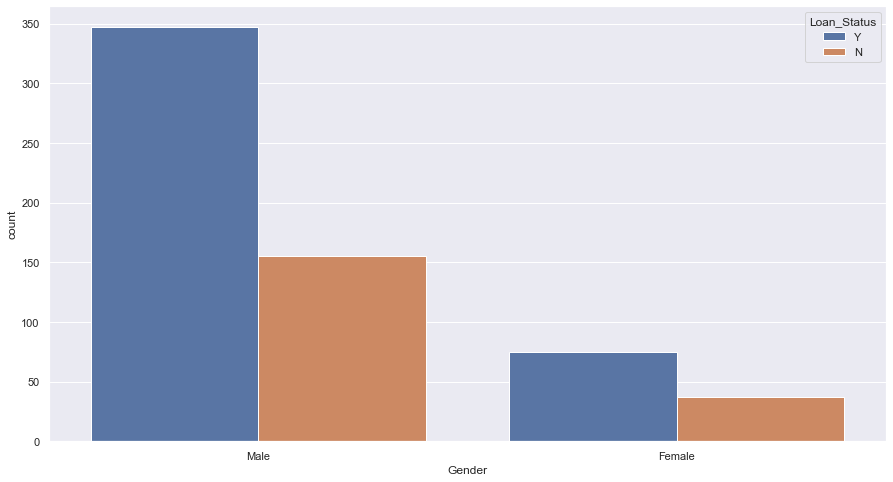

In [64]:
sns.countplot(data = df , x ="Gender" , hue="Loan_Status")

In [65]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128000.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66000.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120000.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141000.0,360.0,1.0,Urban,Y


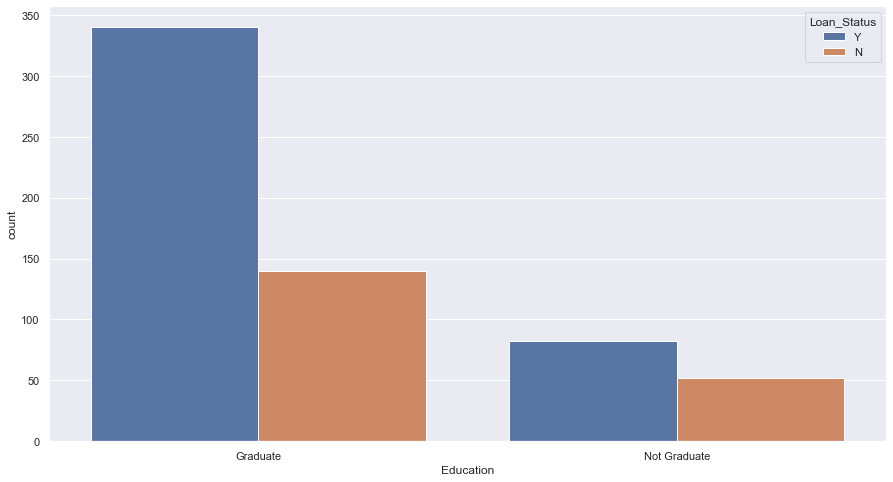

In [66]:
sns.countplot(data = df , x ="Education" , hue="Loan_Status")

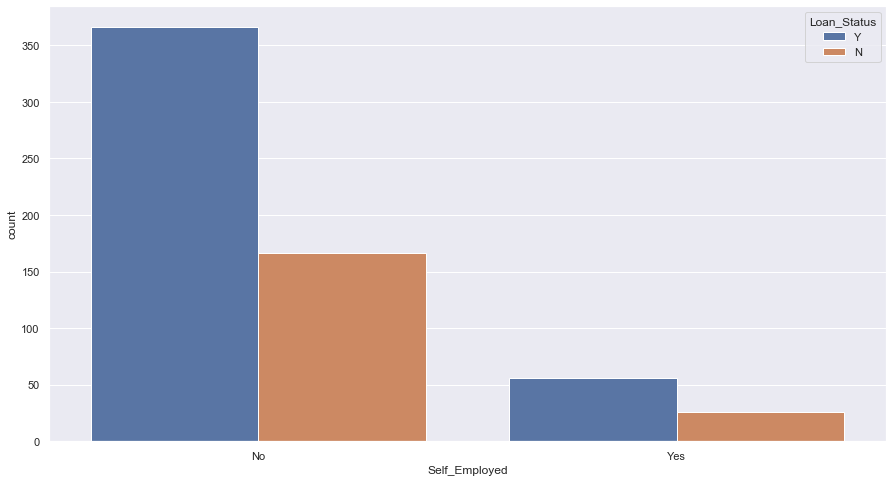

In [67]:
sns.countplot(data = df , x ="Self_Employed" , hue="Loan_Status")

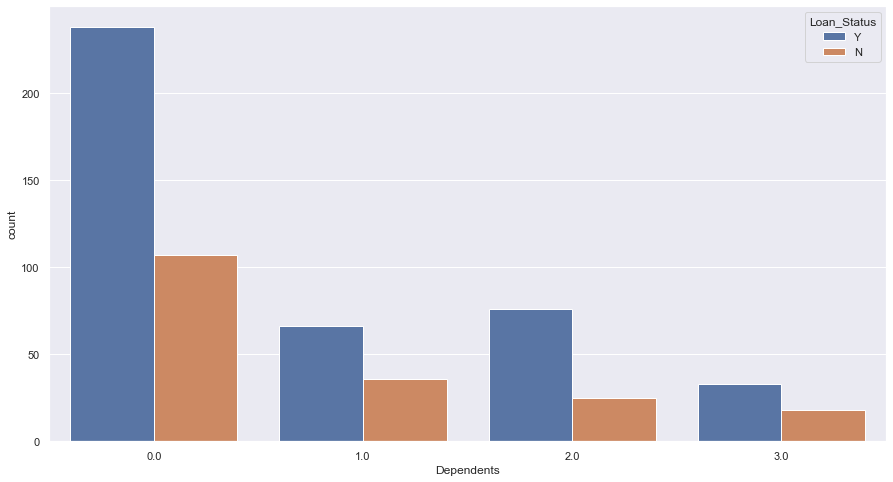

In [68]:
sns.countplot(data = df , x ="Dependents" , hue="Loan_Status")

In [69]:
idx = df['LoanAmount'].value_counts(normalize = True).head(5).index

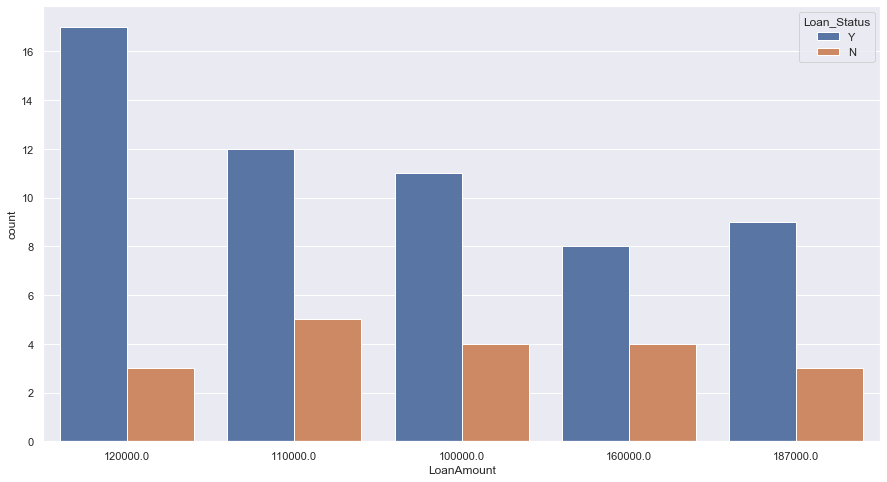

In [70]:
sns.countplot(data = df , x ="LoanAmount" , hue="Loan_Status" , order = idx)

# Prepare Target

In [71]:
Loan_Status_map = { 'Y' : 1 , 'N' : 0}

In [72]:
df['Loan_Status'] = df['Loan_Status'].map(Loan_Status_map)

In [73]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128000.0,360.0,1.0,Rural,0
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66000.0,360.0,1.0,Urban,1
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120000.0,360.0,1.0,Urban,1
4,Male,No,0.0,Graduate,No,6000,0.0,141000.0,360.0,1.0,Urban,1


# Data Processing

In [74]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder , RobustScaler
from category_encoders.binary import BinaryEncoder
from sklearn.impute import KNNImputer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         599 non-null    float64
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    int64  
dtypes: float64(5), int64(2), object(5)
memory usage: 57.7+ KB


In [76]:
df.columns[2]

'Dependents'

In [77]:
# ipmuter = ColumnTransformer(transformers=[("KNNImputer" , KNNImputer(n_neighbors=5) ,['Dependents','LoanAmount','Loan_Amount_Term','Credit_History'])] , remainder="passthrough")

In [78]:
Encoder = ColumnTransformer(transformers=[("KNNImputer" , KNNImputer(n_neighbors=5) ,['Dependents','LoanAmount','Loan_Amount_Term','Credit_History']),("ONH" , OneHotEncoder(sparse=False , drop="first") ,['Gender' , 'Married' , 'Education' , 'Self_Employed' , 'Property_Area'])] , remainder="passthrough")

In [79]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn import set_config

In [80]:
steps = list()
# steps.append(("imputer" , ipmuter ))
steps.append(("Encoder" , Encoder))
steps.append(("Scaler" , RobustScaler()))
steps.append(("Model" , LogisticRegression()))
pipeline = Pipeline(steps = steps)

In [81]:
set_config(display="diagram")
pipeline


Pipeline(steps=[('Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('KNNImputer', KNNImputer(),
                                                  ['Dependents', 'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History']),
                                                 ('ONH',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Gender', 'Married',
                                                   'Education', 'Self_Employed',
                                                   'Property_Area'])])),
                ('Scaler', RobustScaler()), ('Model', LogisticRegression())])

In [82]:
steps

[('Encoder',
  ColumnTransformer(remainder='passthrough',
                    transformers=[('KNNImputer', KNNImputer(),
                                   ['Dependents', 'LoanAmount',
                                    'Loan_Amount_Term', 'Credit_History']),
                                  ('ONH',
                                   OneHotEncoder(drop='first', sparse=False),
                                   ['Gender', 'Married', 'Education',
                                    'Self_Employed', 'Property_Area'])])),
 ('Scaler', RobustScaler()),
 ('Model', LogisticRegression())]

In [83]:
x = df.drop("Loan_Status" , axis = 1 )
y = df["Loan_Status"]

In [84]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128000.0,360.0,1.0,Rural
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66000.0,360.0,1.0,Urban
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120000.0,360.0,1.0,Urban
4,Male,No,0.0,Graduate,No,6000,0.0,141000.0,360.0,1.0,Urban


In [85]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [86]:
x.columns[3]

'Education'

In [87]:
# pipeline.fit(x,y)

In [88]:
scores = cross_validate(pipeline , x , y , cv = 5 , scoring=["accuracy" , "recall" , "precision"] , return_train_score=True)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

In [89]:
scores

{'fit_time': array([0.06730413, 0.08208537, 0.03194451, 0.03660107, 0.03994656]),
 'score_time': array([0.02021837, 0.01785398, 0.00906897, 0.01204181, 0.02050638]),
 'test_accuracy': array([0.82926829, 0.7804878 , 0.7804878 , 0.84552846, 0.81147541]),
 'train_accuracy': array([0.81059063, 0.82281059, 0.81873727, 0.80448065, 0.80691057]),
 'test_recall': array([0.98823529, 0.96470588, 0.97619048, 0.97619048, 0.97619048]),
 'train_recall': array([0.97329377, 0.9851632 , 0.97633136, 0.98224852, 0.97633136]),
 'test_precision': array([0.80769231, 0.77358491, 0.76635514, 0.82828283, 0.7961165 ]),
 'train_precision': array([0.7961165 , 0.80193237, 0.80291971, 0.78672986, 0.79136691])}

In [90]:
scores

{'fit_time': array([0.06730413, 0.08208537, 0.03194451, 0.03660107, 0.03994656]),
 'score_time': array([0.02021837, 0.01785398, 0.00906897, 0.01204181, 0.02050638]),
 'test_accuracy': array([0.82926829, 0.7804878 , 0.7804878 , 0.84552846, 0.81147541]),
 'train_accuracy': array([0.81059063, 0.82281059, 0.81873727, 0.80448065, 0.80691057]),
 'test_recall': array([0.98823529, 0.96470588, 0.97619048, 0.97619048, 0.97619048]),
 'train_recall': array([0.97329377, 0.9851632 , 0.97633136, 0.98224852, 0.97633136]),
 'test_precision': array([0.80769231, 0.77358491, 0.76635514, 0.82828283, 0.7961165 ]),
 'train_precision': array([0.7961165 , 0.80193237, 0.80291971, 0.78672986, 0.79136691])}

In [91]:
scores["train_accuracy"].mean()

0.8127059427417084

In [92]:
scores["test_accuracy"].mean()

0.8094495535119286

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, make_scorer

In [94]:
def classification_report_with_accuracy_score(y_true, y_pred):
    print(classification_report(y_true, y_pred))  # print classification report
    return accuracy_score(y_true, y_pred) # return accuracy score

In [95]:
models = list()
models.append(("LR" , LogisticRegression()))
models.append(("KNN" , KNeighborsClassifier()))
models.append(("CART" , DecisionTreeClassifier()))
models.append(("RF" , RandomForestClassifier()))
models.append(("xg" , XGBClassifier()))


In [96]:
for model in models:
    steps = list()
#     steps.append(("imputer" , ipmuter ))
    steps.append(("Encoder" , Encoder))
    steps.append(("Scaler" , RobustScaler()))
    steps.append(model)
    pipeline = Pipeline(steps = steps)
    scores = cross_validate(pipeline , x , y , scoring=["accuracy" , "recall" , "precision"]  ,cv = 5 , return_train_score=True)
    print(model[0])
    print("Train_accuracy" , scores["train_accuracy"].mean() )
    print("-" * 10)
    print("Test_accuracy" , scores["test_accuracy"].mean())
    print("-" * 20)
    
    print("\n")
    
    print("train_recall" , scores["train_recall"].mean() )
    print("-" * 10)
    print("test_recall" , scores["test_recall"].mean())
    print("-" * 20)
    
    print("\n")
    
    print("train_precision" , scores["train_precision"].mean() )
    print("-" * 10)
    print("test_precision" , scores["test_precision"].mean())
    print("-" * 20)
    
    print("\n")
#     Classfication_report_scores = cross_validate(pipeline, x,y, cv = 5, \
#                scoring=make_scorer(classification_report_with_accuracy_score))
#     print('Classification Report is : \n', Classfication_report_scores )
#     print(f'Precision value is  : {classification_report.split()[19]}')
#     print(f'Recall value is  : {classification_report.split()[20]}')
#     print(f'F1 Score value is  : {classification_report.split()[21]}')
# #     print (Classfication_report_scores) 

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

LR
Train_accuracy 0.8127059427417084
----------
Test_accuracy 0.8094495535119286
--------------------


train_recall 0.9786736431794638
----------
test_recall 0.9763025210084034
--------------------


train_precision 0.79581306886561
----------
test_precision 0.7944063373353597
--------------------


KNN
Train_accuracy 0.7984551189707416
----------
Test_accuracy 0.7149406903905104
--------------------


train_recall 0.9567485470475654
----------
test_recall 0.905126050420168
--------------------


train_precision 0.7928605187800974
----------
test_precision 0.7389996991245258
--------------------


CART
Train_accuracy 1.0
----------
Test_accuracy 0.724696787951486
--------------------


train_recall 1.0
----------
test_recall 0.7889355742296918
--------------------


train_precision 1.0
----------
test_precision 0.8082747480800746
--------------------


RF
Train_accuracy 1.0
----------
Test_accuracy 0.7915500466480075
--------------------


train_recall 1.0
----------
test_recall 0.938

# Choose The Model

In [97]:
from sklearn.linear_model import LogisticRegression

In [98]:
from sklearn.model_selection import GridSearchCV

In [99]:
C = np.logspace(-4, 4, 50)
penalty = ['l1', 'l2']

In [100]:
params = [
        {'C__':C  }
         ]


In [101]:
grid={"Model__C":np.logspace(-3,3,7), "Model__penalty":["l1","l2" , "elasticnet"]}# l1 lasso l2 ridge 

In [102]:
steps = list()
# steps.append(("imputer" , ipmuter ))
steps.append(("Encoder" , Encoder))
steps.append(("Scaler" , RobustScaler()))
steps.append(("Model" , LogisticRegression()))
pipeline = Pipeline(steps = steps)

In [103]:
# grid_search = GridSearchCV(estimator=pipeline,
#                            param_grid=grid,
#                            scoring='accuracy',
#                            cv=10,return_train_score=True, n_jobs=-1)
# grid_search.fit(x, y)

In [104]:
# grid_search.best_params_

In [105]:
# grid_search.cv_results_["mean_test_score"].mean()

In [106]:
# grid_search.cv_results_["mean_train_score"].mean()

In [107]:
# grid_search.best_estimator_

In [108]:
# grid_search.best_estimator_.predict(x)

In [109]:
pipeline.fit(x,y)

Pipeline(steps=[('Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('KNNImputer', KNNImputer(),
                                                  ['Dependents', 'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History']),
                                                 ('ONH',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Gender', 'Married',
                                                   'Education', 'Self_Employed',
                                                   'Property_Area'])])),
                ('Scaler', RobustScaler()), ('Model', LogisticRegression())])

In [110]:
pipeline.predict(x)

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,

In [111]:
pipeline.score(x,y)

0.8078175895765473

In [112]:
pipeline

Pipeline(steps=[('Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('KNNImputer', KNNImputer(),
                                                  ['Dependents', 'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History']),
                                                 ('ONH',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Gender', 'Married',
                                                   'Education', 'Self_Employed',
                                                   'Property_Area'])])),
                ('Scaler', RobustScaler()), ('Model', LogisticRegression())])

In [113]:
scores = cross_validate(pipeline , x , y , cv = 5 , scoring="accuracy" , return_train_score=True)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

In [114]:
scores

{'fit_time': array([0.05608368, 0.05132937, 0.04058409, 0.0163238 , 0.05855322]),
 'score_time': array([0.01515317, 0.0145092 , 0.00697708, 0.00597882, 0.01733899]),
 'test_score': array([0.82926829, 0.7804878 , 0.7804878 , 0.84552846, 0.81147541]),
 'train_score': array([0.81059063, 0.82281059, 0.81873727, 0.80448065, 0.80691057])}

In [115]:
pipeline

Pipeline(steps=[('Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('KNNImputer', KNNImputer(),
                                                  ['Dependents', 'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History']),
                                                 ('ONH',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Gender', 'Married',
                                                   'Education', 'Self_Employed',
                                                   'Property_Area'])])),
                ('Scaler', RobustScaler()), ('Model', LogisticRegression())])

In [116]:
final_model = pipeline

In [126]:
final_model.score(x,y)

0.8078175895765473

In [117]:
inputs = x.columns

In [118]:
import joblib

In [119]:
joblib.dump(final_model , "Model.h5")
joblib.dump( inputs , "Inputs.h5" )

['Inputs.h5']

In [120]:
x.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [121]:
x['Property_Area'].unique().tolist()

['Urban', 'Rural', 'Semiurban']

In [130]:
%%writefile app.py 
import streamlit as st
import joblib 
import pandas as pd

Inputs = joblib.load("Inputs.pkl")
Model = joblib.load("Model.pkl")

def predict(Gender, Married, Dependents, Education, Self_Employed,ApplicantIncome, CoapplicantIncome, LoanAmount,Loan_Amount_Term ,Credit_History,Property_Area):
    test_df = pd.DataFrame(columns = Inputs)
    test_df.at[0,"Gender"] = Gender
    test_df.at[0,"Married"] = Married
    test_df.at[0,"Dependents"] = Dependents
    test_df.at[0,"Education"] = Education
    test_df.at[0,"Self_Employed"] = Self_Employed
    test_df.at[0,"ApplicantIncome"] = ApplicantIncome
    test_df.at[0,"CoapplicantIncome"] = CoapplicantIncome
    test_df.at[0,"LoanAmount"] = LoanAmount
    test_df.at[0,"Loan_Amount_Term"] = Loan_Amount_Term
    test_df.at[0,"Credit_History"] = Credit_History
    test_df.at[0,"Property_Area"] = Property_Area
    result = Model.predict(test_df)[0]
    return result
    
def main():
    st.title("Loan App With Pipline")
    Gender = st.selectbox("Gender" , ['Male', 'Female'])
    st.text(Gender)
    Married = st.selectbox("Married" , ['No', 'Yes'])
    st.text(Married)
    Dependents = st.slider("Dependents" , min_value=0, max_value=10, value=0, step=1)
    st.text(Dependents)
    Education = st.selectbox("Education" ,['Graduate', 'Not Graduate'])
    st.text(Education)
    Self_Employed = st.selectbox("Self_Employed" , ['No', 'Yes'])
    st.text(Self_Employed)
    ApplicantIncome = st.slider("ApplicantIncome" , min_value=0, max_value=200000, value=0, step=1)
    st.text(ApplicantIncome)
    CoapplicantIncome = st.slider("CoapplicantIncome" , min_value=0, max_value=200000, value=0, step=1)
    st.text(CoapplicantIncome)
    LoanAmount = st.slider("LoanAmount" , min_value=1000, max_value=10000000, value=0, step=1000)
    st.text(LoanAmount)
    Loan_Amount_Term = st.selectbox("Loan_Amount_Term" , [360.0, 120.0, 240.0,180.0, 60.0, 300.0, 480.0, 36.0, 84.0, 12.0])
    st.text(Loan_Amount_Term)
    Credit_History = st.selectbox("Credit_History" , [1 , 0])
    st.text(Credit_History)
    Property_Area = st.selectbox("Property_Area" , ['Urban', 'Rural', 'Semiurban'] )
    st.text(Property_Area)
    if st.button("Predict"):
        st.text((Gender, Married, Dependents, Education, Self_Employed , ApplicantIncome, CoapplicantIncome, LoanAmount , Loan_Amount_Term , Credit_History , Property_Area))
        result = predict(Gender, Married, Dependents, Education, Self_Employed , ApplicantIncome, CoapplicantIncome, LoanAmount , Loan_Amount_Term , Credit_History , Property_Area)
        st.text(result)
        label = ["Not Accepted","Accepted"]
        st.text("The output is {}".format(label[result]))
if __name__ == '__main__':
    main()
    
    

Overwriting app.py


In [123]:
inputs = x.columns
model = pipeline

In [124]:
def predict(Gender, Married, Dependents, Education, Self_Employed,ApplicantIncome, CoapplicantIncome, LoanAmount,Loan_Amount_Term ,Credit_History,Property_Area):
    test_df = pd.DataFrame(columns = inputs)
    test_df.at[0,"Gender"] = Gender
    test_df.at[0,"Married"] = Married
    test_df.at[0,"Dependents"] = Dependents
    test_df.at[0,"Education"] = Education
    test_df.at[0,"Self_Employed"] = Self_Employed
    test_df.at[0,"ApplicantIncome"] = ApplicantIncome
    test_df.at[0,"CoapplicantIncome"] = CoapplicantIncome
    test_df.at[0,"LoanAmount"] = LoanAmount
    test_df.at[0,"Loan_Amount_Term"] = Loan_Amount_Term
    test_df.at[0,"Credit_History"] = Credit_History
    test_df.at[0,"Property_Area"] = Property_Area
    result = model.predict(test_df)[0]
    return result
    

In [125]:
predict('Female', 'Yes', 2, 'Not Graduate', 'Yes', 57045, 59034, 2540000, 120.0, 1, 'Urban')

0